# 텍스트 전처리

#### 전처리 과정

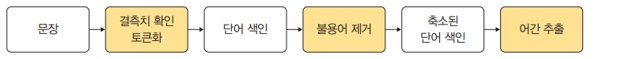

- 클렌징(cleansing)
- 토큰화(Tokenization)
- 필터링/ 스톱 워드(불용어) 제거 / 철자 수정
- 어간 추출(Stemming & Lemmatization)

## 1. 클렌징(Cleansing)

- 결측치 처리 및 텍스트 분석에 방해되는 불필요한 문자, 기호 등을 사전에 제거하는 작업
- 예. HTML, XML 태그나 특정 기호 등을 사전에 제거
- 정규표현식 사용

### 1-1. 결측치 확인 및 처리

#### **결측치 확인**
- df.isnull()
- df.isna()
- df.isnull().sum()

#### **결측치 처리**

① 결측치 삭제
   - df.dropna()
   - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
    
    

```python
DataFrame.dropna(*, axis=0, how=_NoDefault.no_default, 
                 thresh=_NoDefault.no_default, subset=None, inplace=False)
```

② 결측치 대체
- df.fillna()
  - 평균값이나 다른 특정한 값으로 결측치 대체
  - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
```python
DataFrame.fillna(value=None, *, method=None, axis=None,
                 inplace=False, limit=None, downcast=None)
```

- df.bfill()
   - 뒤에 있는 값으로 결측치 대체
   - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.bfill.html

```python
DataFrame.bfill(*, axis=None, inplace=False, limit=None, 
                limit_area=None, downcast=_NoDefault.no_default)
```

- df.ffill()
    - 앞에 있는 값으로 결측치 대체
    - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ffill.html
```python
DataFrame.ffill(*, axis=None, inplace=False, limit=None, 
                limit_area=None, downcast=_NoDefault.no_default)
```

- df.interpolate()
  - 선형보간법(linear)을 이용하여 결측치 대체
  - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html

```python
DataFrame.interpolate(method='linear', *, axis=0, limit=None, inplace=False, 
                      limit_direction=None, limit_area=None, 
                      downcast=_NoDefault.no_default, **kwargs)
```

### 1-2. 정규표현식(regular expression)

- 정규표현식은 복잡한 문자열을 처리할 때 사용하는 기법
- 문자열을 처리하는 모든 곳에 사용하는 일종의 형식 언어

#### 1) 정규표현식의 필요성

문제. 주민등록번호를 포함하고 있는 텍스트에서 모든 주민등록번호 뒷자리를 * 문자로 변경하시오.

In [12]:
data = '''park 700105-1049118
choi 901010-1234103
kim  800905-2039104
kang 650192-1029310
seo  001023-3019301
han  020113-4029481'''

정규표현식을 모르는 경우 프로그램 작성 과정

1. 전체텍스트를 공백 문자로 나눈다(split)
2. 나뉜 단어가 주민등록번호 형식인지 조사한다
3. 단어가 주민등록번호 형식이라면 뒷자리를 *로 변환한다
4. 나뉜 단어를 다시 조립한다

정규표현식을 사용하는 경우

#### 2) 정규표현식 모듈 **re**

- re(regular expression) 모듈
- 파이썬 내장 표준 라이브러리
- https://docs.python.org/ko/3/library/re.html

- `re` 모듈 임포트

```python
import re
```

#### 3) re.compile() 함수

```python
re.compile(pattern, flags=0)
```

- 정규식 패턴을 정규식 객체로 컴파일 
```python
pattern = re.compile('ab*')
```

- compile로 생성된 정규식 패턴 객체는 match(), search(), findall(), finditer() 등 문자열 검색을 위한 메서드를 사용할 수 있음.

#### 4) 문자열 검색 메서드

re.compile()로 생성된 패턴 객체를 이용하여 문자열을 검색하는 메서드

**match()**
- 문자열의 처음부터 정규식과 매칭되는지 조사
- 정규식에 부합되면 match 객체 반환

```python
Pattern.match(string[, pos[, endpos]])
```

**search()**

- match() 메서드와 동일
- 문자열 전체를 검색하여 정규식과 패치되는지 조사

```python
Pattern.search(string[, pos[, endpos]])
```

**findall()**

- 정규식과 매치되는 모든 문자열(substring)을 리스트로 반환
```python
Pattern.findall(string[, pos[, endpos]])
```

**finditer()**

- 정규식과 매치되는 모든 문자열(substring)을 반복 가능한 객체로 반환
```python
Pattern.finditer(string[, pos[, endpos]])
```

#### 5) match 객체의 메서드

match 객체 : match(), search(), findall(), finditer() 메서드에 의해 반환된 매치 객체(match object)

- group() : 매치된 문자열을 반환
- start() : 매치된 문자열의 시작 위치 반환
- end() : 매치된 문자열이 끝 위치 반환
- span() : 매치된 문자열의 (시작, 끝)에 해당하는 튜플 반환

#### 6) 정규 표현식 기초 : 메타문자(meta character)

**메타문자(meta character)¶**
- 원래 그 문자가 가진 뜻이 아닌 특별한 의미를 가진 문자
- 정규표현식에서 사용하는 메타문자 : . ^ $ * + ? { } [ ] \ | ( )

**① 메타 문자 [ ]**
- 의미 :  [ ] 사이의 문자들과 매치(match)
- `[ ]` 사이에는 어떤 문자도 들어갈 수 있음
- 예. 정규식 [abc] : a, b, c 중 한 개의 문자와 매치

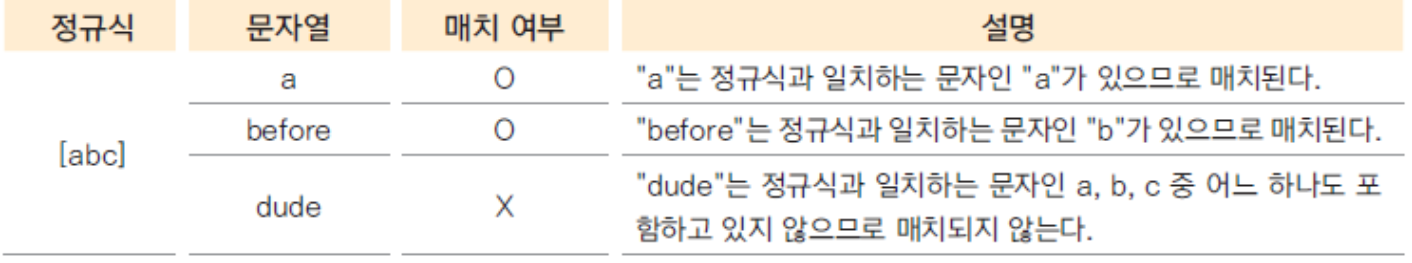

- `[ ]`안의 두 문자 사이에 하이픈(-)을 사용하면 두 문자사이의 범위를 의미
    - 예. [a-c]  : [abc]와 동일한 의미
    - 예. [0-5] : [012345]와 동일한 의미
    - 예. `[a-zA-Z]` : 모든 알파벳
    - 예. `[0-9]` : 모든 숫자

- `[^문자]` : 해당 문자를 제외한 문자를 매치

**② 메타 문자 .**

- \n을 제외한 모든 문자와 매치됨
- 예. a.b : a와 b라는 문자 사이에 어떤 문자가 들어가도 모두 매치됨 

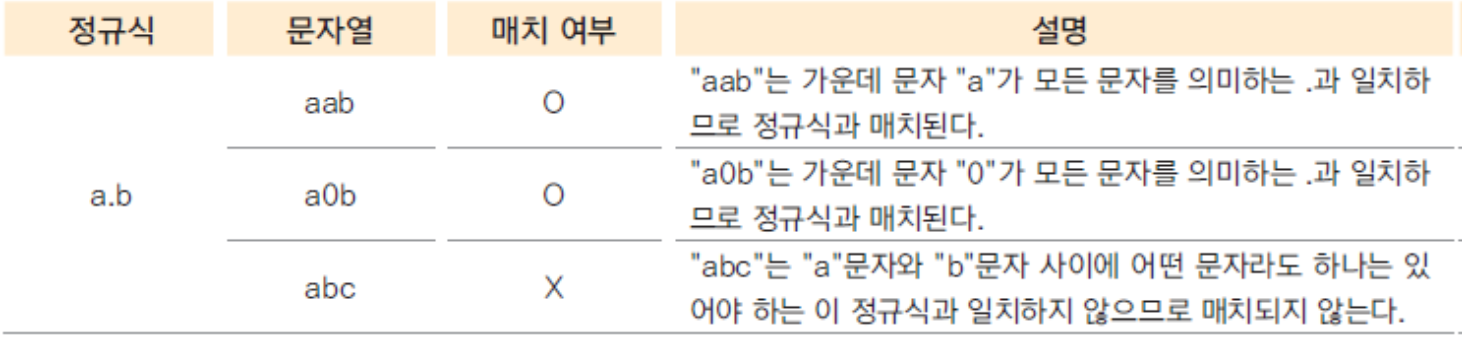

- 주의. a[.]b : [ ]안에 있는 .은 메타문자가 아니라 .문자 그자체를 의미함

**③ 메타 문자** *
- 반복을 의미
- 0부터 무한대까지 반복될 때 사용 (실제로는 메모리 제한으로 무한대가 아닌 2억개 정도만 가능)
- 예. ca*t : * 바로 앞에 있는 문자 a가 0부터 무한대까지 반복될 수 있다는 의미

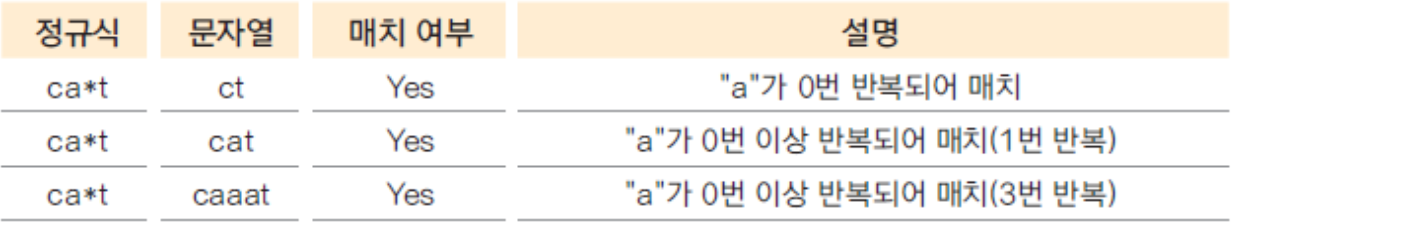

**④ 메타 문자 +**

- 반복을 의미
- 최소 1번 이상 반복될 때 사용
- *가 반복횟수가 -부터라면 +는 반복횟수가 1부터
- 예. ca+t : + 앞에 있는 문자 a가 1부터 무한대까지 반복될 수 있음

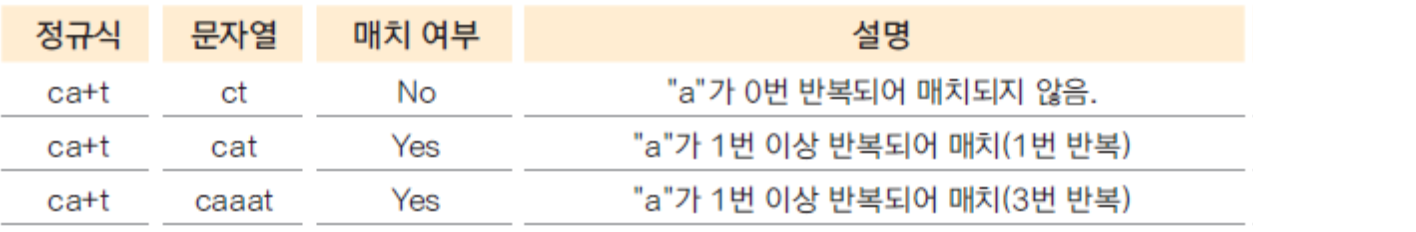

**⑤ 메타 문자 { }**

- 빈복 횟수를 고정
- {m} : 반복횟수가 m
- {m, n} : 반복횟수가 m부터 n까지인 문자와 매치
- m 또는 n은 생략 가능
- 예. {3, } : 반복횟수가 3이상인 경우
- 예. {, 3} : 반복횟수가 3이하인 경우
- 생략된 m은 0과 동일, 생략된 n은 무한대(2억개 미만)를 의미
- 예. ca{2}t

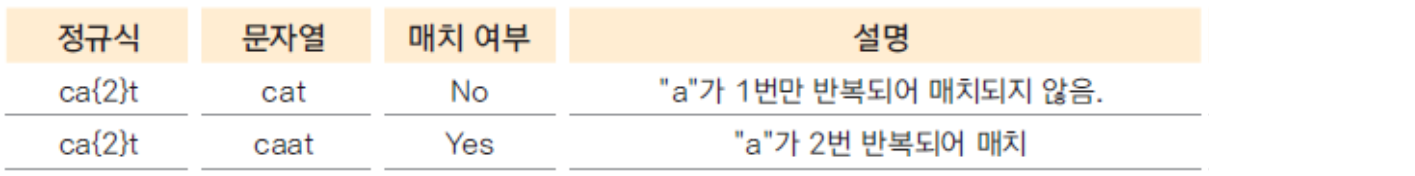

- 예. ca{2, 5}t

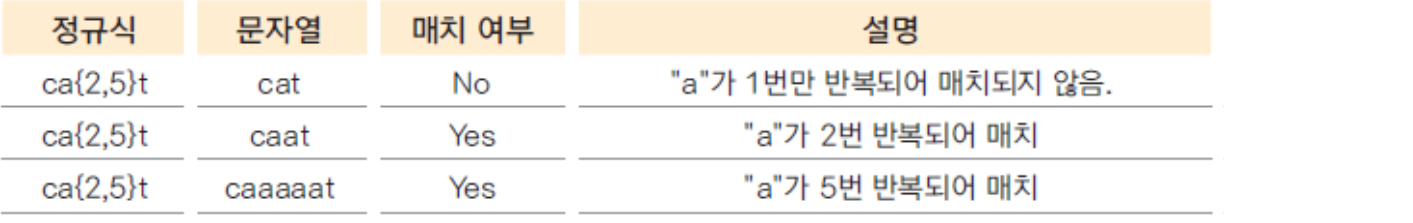

**⑥ 메타문자 ?**

- {0, 1}을 의미
- ab?c : b가 있어도 되고 없어도 됨

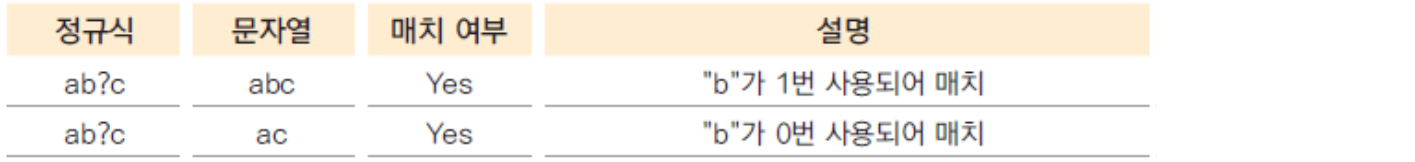

**⑦ 메타문자 |**
- or 의미
- 예. A|B  : A 또는 B

**⑧ 메타문자 ^**
- 문자열의 맨처음과 일치함을 의미
- 예. ^Life : Life 문자열이 처음에 온 경우 매치되나, 처음 위치가 아닌 경우 매치되지 않음

**⑨ 메타문자 $**

- 문자열의 끝과 일치함을 의미
- 예. short$ : 검색할 문자열이 short로 끝난 경우 매치되나 그 외의 경우는 매치되지 않음

**⑩ 메타문자 \A**
- 문자열의 처음과 일치함을 의미
- ^ 문자와 동일하나 re.MULTILINE 옵션을 사용할 경우 다르게 해석됨
    - ^ : 각 줄의 문자열의 처음과 매치
    - \A : 줄과 상관없이 전체 문자열의 처음하고만 매치

**⑪ 메타문자 \Z**

- 문자열의 끝과 매치됨을 의미
- \A와 동일하게 re.MULTILINE 옵션을 사용할 경우 $ 문자와 다르게 해석됨
    - `$` : 각 줄의 문자열의 끝과 매치
    - \Z : 줄과 상관없이 전체 문자열의 끝하고만 매치

**⑫ 메타문자 \b**

- 단어 구분자
- 보통 whitespace에 의해 구분됨
- 예. \bclass\b  : 앞 뒤가 whitespace로 구분된 class라는 단어와 매치
- 파이썬 리터럴 규칙에 의해 \b는 백스페이스(backspace)를 의미하므로, 정규식에서 사용할 때 단어구분자라는 것을 알리기 위해 raw string임을 알려주는 구분 기호 r' '을 반드시 사용해야 함
    - 예. r'\bclass\b'

**⑬ 메타문자 \B**

- \b 메타문자와 반대의 경우
- whitespace로 구분된 단어가 아닌 경우에만 매치

#### 7) 그룹핑(grouping) 메타문자  ( )

- 그룹을 만들어 주는 메타문자

#### 8) 컴파일 옵션

정규식을 컴파일할 때 사용할 수 있는 옵션

- re.DOTALL : 약어는 `S`, `.` 메타문자가 줄바꿈 문자를 포함해 모든 문자와 매치될 수 있게 함
- re.IGNORECASE : 약어는 `I`, 대소문자에 관계없이 매치될 수 있게 함
- re.MULTILINE : 약어는 `M`, 여러 줄과 매치될 수 있게 함. `^, $` 메타문자 사용과 관계있는 옵션
- re.VERBOSE : 약어는 `X`, verbose 모드는 사용할 수 있게 함. 정규식을 보기 편하게 만들수 있고 주석 등을 사용할 수 있게 함

**re.DOTALL**

- 여러 줄로 이루어진 문자열에서 줄바꿈 문자에 상관없이 검색할 때 많이 사용

**re.IGNORECASE**

**re.MULTILINE**

**re.VERBOSE**

- 정규식이 복잡한 경우 주석을 적고 여러 줄로 표현하여 가독성을 높이기 위한 옵션
- VERBOSE 옵션을 사용하면 문자열에 사용된 whitespace는 컴파일할 때 제거됨

#### 9) 역슬래시(\) 문제

- `\s, \t, \n, \r, \f, \v `는 공백을 의미하는 escape 문자이므로 정규표현식에서 역슬래시 한번 사용하면 공백문자로 인식할 수 있음 
- 역슬래시를 두 번 사용하거나 raw string 표현을 사용

#### 10) 문자 규칙

- 역슬래시를 이용한 문자 규칙
- `\\\` : 역슬래스 문자 자체
- `\\d` : 모든 숫자를 의미. `[0-9]`와 동일
- `\\D` : 숫자를 제외한 모든 문자. `[^0-9]`와 동일
- `\\s` : 공백문자. `[ \t\n\r\f\v]`와 동일
- `\\S` : 공백을 제외한 문자. `[^ \t\n\r\f\v]`와 동일
- `\\w` : 문자 또는 숫자. `[a-zA-Z0-9]`와 동일
- `\\W` : 알파벳 문자 또는 숫자가 아닌 문자.  `[^a-zA-Z0-9]`와 동일

#### 11) 문자열 분리 re.split()

- 정규표현식을 기준으로 문자열들을 분리하여 리스트로 반환
- 토큰화에 유용하게 사용함

#### 12) 문자열 바꾸기 : re.sub()

- 정규식과 매치되는 부분을 다른 문자로 변경
- 태그나 특수문자, 기호 제거를 위해 사용

```python
Pattern.sub(repl, string, count=0)
```

- 문자열에서 특수문자만 제거

- 문자열에서 숫자만 남기기

- 문자열에서 숫자만 제거

- 문자열에서 알파벳만 남기기

- HTML 태그 제거

In [ ]:
html_tag = '''   <main id="kakaoContent" class="doc-main"> 
    <section class="inner-main"> 
     <h2 class="screen_out">경제</h2> 
     <div class="main-content" data-cloud-area="addition"> 
      <article id="mArticle" class="box_view" data-cloud-area="article"> 
       <div class="head_view" data-tiara-layer="article_head" data-cloud="newsview_article_head"> 
        <h3 class="tit_view">서울 집값 역대 세 번째로 많이 떨어졌다</h3> 
        <div class="info_view"> <span class="txt_info">이송렬</span> <span class="txt_info">입력 <span class="num_date">2022. 10. 20. 14:01</span></span> 
        </div>  
        <div class="util_wrap"> <button type="button" class="btn_cmt" data-tiara-action-name="헤드댓글수_클릭" data-tiara="댓글버튼"> <span class="ico_view ico_cmt">댓글</span> <span class="num_cmt alex-count-area">0</span> </button>  
         <div class="util_view"> 
          <div class="item_util" data-tiara-action-name="헤드음성_클릭"> <button type="button" class="btn_util btn_tts" data-tiara="음성버튼"> <span class="ico_view">음성으로 듣기</span> </button>  
           <div id="ttsViewLayer" class="view_layer"> 
            <div class="inner_view_layer inner_tts_layer"> 
             <div class="layer_head"> <strong class="tit_layer">음성재생 설정</strong>
              <p dmcf-pid="Qj3F8kJG0n" dmcf-ptype="general"><br>노원구도 0.4% 하락해 도봉구에 이어 두 번째로 많이 내렸다. 상계동 ‘임광’ 전용 122㎡는 지난 4일 10억8000만원에 매매 계약을 맺었다. 지난 5월 거래된 13억1000만원보다 2억3000만원 하락했다.</p>
          <p dmcf-pid="xA036EiHzi" dmcf-ptype="general">중계동에 있는 ‘중계무지개’ 전용 49㎡도 지난 12일 5억1500만원에 손바뀜해 직전 거래 6억2900만원(6월)보다 1억1400만원 내렸고, 월계동 ‘한진한화그랑빌’ 전용 75㎡도 지난 1일 8억5000만원에 팔려 올해 1월(9억6000만원)보다 1억1000만원 몸값이 낮아졌다.</p>
          <p dmcf-pid="yUNaSzZd0J" dmcf-ptype="general">노원구 상계동에 있는 A 공인 중개 관계자는 “노원, 도봉, 강북 등은 최근 수년, 특히 지난해 급등했던 곳”이라면서 “너무 급하게 오른 영향으로 요즘엔 매수 문의조차 뜸한 가운데 급매물 위주로 거래되는 중”이라고 했다.</p>
          <p dmcf-pid="WHRMD5lfFd" dmcf-ptype="general">이 밖에도 △송파구(-0.38%) △성북구(-0.37%) △은평구(-0.36%) △강동구(-0.31%) △금천구(-0.3%) 등도 매물이 쌓이면서 하락률이 높아졌다.</p>
          <figure class="figure_frm origin_fig" dmcf-pid="YXeRw1S40e" dmcf-ptype="figure">
           <p class="link_figure"><img alt="매매 및 전세가격지수 변동률 사진=한국부동산원" class="thumb_g_article" data-org-src="https://t1.daumcdn.net/news/202210/20/ked/20221020140119337feul.jpg" data-org-width="630" dmcf-mid="KBbBJCA0pk" dmcf-mtype="image" height="auto" src="https://img2.daumcdn.net/thumb/R658x0.q70/?fname=https://t1.daumcdn.net/news/202210/20/ked/20221020140119337feul.jpg" width="658"></p>
           <figcaption class="txt_caption default_figure">
            매매 및 전세가격지수 변동률 사진=한국부동산원
           </figcaption>
          </figure>
          <p dmcf-pid="GXeRw1S4FR" dmcf-ptype="general"><br>전셋값도 빠르게 하향 조정되고 있다. 서울 전셋값은 0.3% 내려 전주(-0.22%)보다 더 내렸다. 송파구 전셋값이 0.76% 내리면서 서울 내 자치구 가운데 가장 큰 폭으로 하락했다.</p>
          <p dmcf-pid="HZdertv8UM" dmcf-ptype="general">가락동에 있는 ‘가락(1차)쌍용아파트’ 전용 84㎡는 지난 23일 6억3000만원에 세입자를 들였다. 이달 초 7억8000만원에도 계약이 맺어졌던 면적대인데 불과 며칠 만에 전셋값이 크게 내렸다. 같은 아파트 전용 59㎡도 지난 7일 5억7000만원에 거래됐는데 현장엔 5억원까지 하락한 매물도 나와 있는 것으로 전해졌다.</p>
          <p dmcf-pid="X5JdmFT6px" dmcf-ptype="general">가락동 B 공인 중개 관계자는 “세입자를 찾지 못한 집주인들이 마음이 급하다 보니 가격을 빠르게 낮추고 있다”며 “불과 한 달 새 전셋값이 많이 내린 상황”이라고 했다.</p>
          <p dmcf-pid="ZT68jYsbuQ" dmcf-ptype="general">송파를 제외한 강남권에선 강동구(-0.45%)가 고덕, 상일, 암사동 위주로 하락했고 양천구(-0.3%)는 신정동과 목동 대단지 아파트를 중심으로 전셋값이 내렸다. 강북권에선 강북구(-0.54%)가 가장 큰 폭으로 내렸다. 미아동에 있는 선호도가 높은 단지 위주로 매물이 쌓이면서다. 성북구(-0.34%)도 길음동과 돈암동을 중심으로 전셋값이 내렸고 은평구(-0.42%), 종로구(-0.33%)도 큰 폭으로 빠졌다.</p>
          <p dmcf-pid="5yP6AGOKpP" dmcf-ptype="general">한편 최근 아파트 매매 심리는 악화하고 있다. 국토연구원 부동산시장연구센터가 발표한 부동산시장 소비자 심리조사 결과에 따르면 수도권 소비자심리지수는 89.0으로 전달보다 1.4포인트 올랐지만 석 달 연속 하강 국면을 기록했다. 전세시장에서 수도권 지수는 82.8로 전달보다 4.4포인트 하락했다. 주택시장 소비심리지수는 95 미만이면 하강 국면, 95∼114는 보합, 115 이상은 상승 국면으로 구분한다.</p>
          <p dmcf-pid="1WQPcHI9p6" dmcf-ptype="general">이송렬 한경닷컴 기자 yisr0203@hankyung.com</p>
             
             '''

- BeautifulSoup 패키지 모듈의 get_text() 사용하여 태그 제거

-------------